In [33]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
df=pd.read_csv("data_nps.csv")

In [35]:
#Cargamos el dataframe y nos interiorizamos de sus campos
#Que no haya una columna que se llame 'Unnamed: 0'
df=df.drop(df.columns[0], axis='columns')

In [36]:
df.tail()

,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS
15995,2021-05-10 10:30:03 UTC,2021-05-10 10:46:11 UTC,5,M,1974-11-24 00:00:00 UTC,23609326,46.0,ISIDRO CASANOVA,Documentation Request,5436373,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,9,mot Siniestro mot Cobertura poliza
15996,2021-05-10 10:30:03 UTC,2021-05-10 12:12:26 UTC,0,M,1960-09-21 00:00:00 UTC,11254684,60.0,CIUDAD AUTONOMA BUENOS AIRES,Documentation Request,5434652,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,mot Siniestro mot FacturacionPagos mot Prec...
15997,2021-05-10 10:30:03 UTC,2021-05-10 19:38:46 UTC,0,M,1960-07-15 00:00:00 UTC,16971297,60.0,SAN MIGUEL DE TUCUMAN,Documentation Request,5435120,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,NaN
15998,2021-05-10 10:30:03 UTC,2021-05-10 10:45:03 UTC,2,M,1956-07-10 00:00:00 UTC,5768360,64.0,VILLA DOMINICO,Documentation Request,5434365,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,2,mot Siniestro atr Conformidad mot Facturaci...
15999,2021-05-10 10:39:05 UTC,2021-05-10 12:02:05 UTC,0,F,1965-11-22 00:00:00 UTC,8703935,55.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5426739,2021-05-07 00:00:00 UTC,SUCURSAL,Automotores Individuales,8,mot Servicio


In [37]:
#mostrar nombres de columna
df.columns.to_list()

['CREATION_DATE',
 'RESPONSE_DATE',
 'CURRENT_STATUS',
 'GENDER',
 'DAY_OF_BIRTH',
 'CIF_ID',
 'AGE',
 'LOCATION',
 'TOUCHPOINT_NUMBER',
 'CASE_NUMBER',
 'CASE_DATE',
 'CASE_CHANNEL',
 'PRODUCT_NAME',
 'NPS_SCORE',
 'TAGS']

Hacer una función que determine si es promotor, detractor y neutro e implementarla a una columna del dataset que se llama nps_segment
* Promotor: NPS_SCORE = 8,9,10
* Neutro: NPS_SCORE = 6,7
* Detractor: NPS_SCORE = 1,2,3,4,5

In [38]:
def nps_segment(x):
   if x <= 5:
       return 'DETRACTOR'
   elif 6<= x <= 7:
       return 'Neutro'
   else:
       return 'Detractor'
#df["nombre_de_la_columna_nueva"] = df["Columna_a_transformar"].apply(función_creada_por_nosotros)


In [39]:
conditions= {8:"Promotor",9:"Promotor",10:"Promotor",6:"Neutro",7:"Neutro",1:"Detractor",2:"Detractor",
             3:"Detractor",4:"Detractor",5:"Detractor",0:"Detractor"}
df["nps_segment"]=df['NPS_SCORE'].map(conditions)
df.nps_segment

0        Detractor
1         Promotor
2         Promotor
3         Promotor
4        Detractor
           ...    
15995     Promotor
15996       Neutro
15997       Neutro
15998    Detractor
15999     Promotor
Name: nps_segment, Length: 16000, dtype: object

In [40]:
df["nps_segment"]

0        Detractor
1         Promotor
2         Promotor
3         Promotor
4        Detractor
           ...    
15995     Promotor
15996       Neutro
15997       Neutro
15998    Detractor
15999     Promotor
Name: nps_segment, Length: 16000, dtype: object

In [41]:
#imprimir nans en la columna TAGS
df.TAGS.isnull().sum()

2184

Con numpy.where crear una columna llamada detected, que determina si la columna TAGS tiene algun contenido. Poner True si lo tiene y si no tiene contenido poner False.

In [42]:
#Escribi tu código acá (HINT: Buscar numpy where documentacion)
#df['Status'] = np.where(df['Salary']>=400, 'Senior', 'Junior')
df["detected"]=np.where(df['TAGS'].isnull(),False,True)
df["detected"]

0         True
1         True
2        False
3         True
4         True
         ...  
15995     True
15996     True
15997    False
15998     True
15999     True
Name: detected, Length: 16000, dtype: bool

## Dates
Devolver la fecha máxima y minima de la columna CREATION_DATE

In [43]:
df.CREATION_DATE=pd.to_datetime(df.CREATION_DATE)

In [44]:
df.CREATION_DATE.max()
df.CREATION_DATE.min()

Timestamp('2020-12-10 10:30:03+0000', tz='UTC')

Chequear los data types de todas las columnas

In [45]:
df.dtypes

CREATION_DATE        datetime64[ns, UTC]
RESPONSE_DATE                     object
CURRENT_STATUS                     int64
GENDER                            object
DAY_OF_BIRTH                      object
CIF_ID                             int64
AGE                              float64
LOCATION                          object
TOUCHPOINT_NUMBER                 object
CASE_NUMBER                        int64
CASE_DATE                         object
CASE_CHANNEL                      object
PRODUCT_NAME                      object
NPS_SCORE                          int64
TAGS                              object
nps_segment                       object
detected                            bool
dtype: object

¿Cual es el data type de CREATION_DATE ¿Te parece correct?
esta en formato fecha lo cual es correcto

Crear una columna que solo tenga año y mes. Llameémosle year_month. Utilizar pd.to_datetime() primero y luego to period

In [46]:
#tarjetas['dia']= pd.DatetimeIndex(tarjetas['fecha_de_pago']).day
df["year_month"]=pd.DatetimeIndex(df.CREATION_DATE).to_period('m')
df['year_month']

C:\Users\Nicolas\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


0        2021-06
1        2021-06
2        2021-06
3        2021-06
4        2021-05
          ...   
15995    2021-05
15996    2021-05
15997    2021-05
15998    2021-05
15999    2021-05
Name: year_month, Length: 16000, dtype: period[M]

C:\Users\Nicolas\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


0        2021-06
1        2021-06
2        2021-06
3        2021-06
4        2021-05
          ...   
15995    2021-05
15996    2021-05
15997    2021-05
15998    2021-05
15999    2021-05
Name: year_month, Length: 16000, dtype: period[M]

In [47]:
#armar el código para crear la columna año mes
df["year_month"]

0        2021-06
1        2021-06
2        2021-06
3        2021-06
4        2021-05
          ...   
15995    2021-05
15996    2021-05
15997    2021-05
15998    2021-05
15999    2021-05
Name: year_month, Length: 16000, dtype: period[M]

## Conteo.
Crear un nuevo dataframe agrupado por year_month donde tenga la cantidad de encuestas únicas mes a mes
** Hint**:
```python
df.groupby(grouping_column).agg("count")
```

In [64]:
encuestas_por_mes=df.groupby(df.year_month).year_month.count()
encuestas_por_mes

year_month
2020-12     124
2021-01    2617
2021-02    2433
2021-03    3308
2021-04    2883
2021-05    3066
2021-06    1569
Freq: M, Name: year_month, dtype: int64

In [71]:
encuestas_por_mes["year_month"]='encuestas por mes'
encuestas_por_mes

year_month
2020-12                     124
2021-01                    2617
2021-02                    2433
2021-03                    3308
2021-04                    2883
2021-05                    3066
2021-06                    1569
year_month    encuestas por mes
Name: year_month, dtype: object

year_month
2020-12                     124
2021-01                    2617
2021-02                    2433
2021-03                    3308
2021-04                    2883
2021-05                    3066
2021-06                    1569
year_month    encuestas por mes
Name: year_month, dtype: object

In [49]:
df

,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS,nps_segment,detected,year_month
0,2021-06-11 10:30:03+00:00,2021-06-12 10:43:18 UTC,2,M,1954-09-18 00:00:00 UTC,1402267,66.0,DOMINGO FAUSTINO SARMIENTO,Service,5671770,2021-06-09 00:00:00 UTC,EUROP,Automotores Individuales,0,mot Grua mot Servicio mot Accesibilidad mo...,Detractor,True,2021-06
1,2021-06-10 10:30:03+00:00,2021-06-12 17:38:35 UTC,5,F,1994-10-06 00:00:00 UTC,23733377,26.0,CORDOBA,Service,5662123,2021-06-08 00:00:00 UTC,AUXICAJA,Automotores Individuales,9,mot Servicio mot Precio atr Eficacia mot A...,Promotor,True,2021-06
2,2021-06-07 10:30:03+00:00,2021-06-12 16:52:27 UTC,5,M,1980-08-07 00:00:00 UTC,21113765,40.0,DIAMANTE,Service,5625253,2021-06-03 00:00:00 UTC,AUXICAJA,Automotores Individuales,10,NaN,Promotor,False,2021-06
3,2021-06-10 10:30:03+00:00,2021-06-13 19:29:41 UTC,5,M,1959-09-12 00:00:00 UTC,19579674,61.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5663499,2021-06-09 00:00:00 UTC,SUCURSAL,Automotores Individuales,10,mot Grua atr Eficacia,Promotor,True,2021-06
4,2021-05-31 10:30:03+00:00,2021-06-06 22:26:27 UTC,1,M,1952-04-19 00:00:00 UTC,13972088,69.0,TRANCAS,Claims,5582911,2021-05-21 00:00:00 UTC,CALL CENTER,Automotores Individuales,0,mot Siniestro atr Eficacia,Detractor,True,2021-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,2021-05-10 10:30:03+00:00,2021-05-10 10:46:11 UTC,5,M,1974-11-24 00:00:00 UTC,23609326,46.0,ISIDRO CASANOVA,Documentation Request,5436373,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,9,mot Siniestro mot Cobertura poliza,Promotor,True,2021-05
15996,2021-05-10 10:30:03+00:00,2021-05-10 12:12:26 UTC,0,M,1960-09-21 00:00:00 UTC,11254684,60.0,CIUDAD AUTONOMA BUENOS AIRES,Documentation Request,5434652,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,mot Siniestro mot FacturacionPagos mot Prec...,Neutro,True,2021-05
15997,2021-05-10 10:30:03+00:00,2021-05-10 19:38:46 UTC,0,M,1960-07-15 00:00:00 UTC,16971297,60.0,SAN MIGUEL DE TUCUMAN,Documentation Request,5435120,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,NaN,Neutro,False,2021-05
15998,2021-05-10 10:30:03+00:00,2021-05-10 10:45:03 UTC,2,M,1956-07-10 00:00:00 UTC,5768360,64.0,VILLA DOMINICO,Documentation Request,5434365,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,2,mot Siniestro atr Conformidad mot Facturaci...,Detractor,True,2021-05


Crear un dataste donde sume la cantidad de encuestas con TAG detectados, mes a mes

**Hint** :
```python
df.groupby(grouping_column).agg(
    new_col_name =  ('old_col_name', 'sum'),
    new_col_name_2 = ('old_col_name', 'mean')
)
```

In [88]:
encuestas_con_tag= df.groupby("year_month")["detected"].sum()
encuestas_con_tag

year_month
2020-12     111
2021-01    2246
2021-02    2139
2021-03    2866
2021-04    2466
2021-05    2632
2021-06    1356
Freq: M, Name: detected, dtype: int64

Crear otro dataset donde tenga la cantidad de encuestas por nps_segment unicas por mes. promotoras, neutras y detractoras.

In [90]:
encuestas_con_tag_por_categoriaa= df.groupby(by=["year_month","nps_segment"])["detected"].count()
encuestas_con_tag_por_categoriaa

year_month  nps_segment
2020-12     Detractor        14
            Neutro            7
            Promotor         90
2021-01     Detractor       375
            Neutro          143
            Promotor       1728
2021-02     Detractor       437
            Neutro          128
            Promotor       1574
2021-03     Detractor       511
            Neutro          202
            Promotor       2153
2021-04     Detractor       372
            Neutro          166
            Promotor       1928
2021-05     Detractor       383
            Neutro          173
            Promotor       2076
2021-06     Detractor       197
            Neutro           81
            Promotor       1078
Name: detected, dtype: int64

### Seg,emtps
Crear un dataset que agrupe por segmento los CIF_ID únicos

In [89]:

dataset_por_segmento= df.groupby('nps_segment')['CIF_ID'].nunique()
dataset_por_segmento

nps_segment
Detractor     2515
Neutro        1129
Promotor     12356
Name: CIF_ID, dtype: int64

In [ ]:
#reset_index() implementalo al dataset y asignaselo
dataset_por_segmento

Cantidad que hay por detractor, promotor y neutro

# Countplot
Hacer un countplot por la cantidad de NPS segment

In [92]:
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 6,6
paleta = ["#66bd63","#a50026", "#fee08b"]

<AxesSubplot:xlabel='nps_segment', ylabel='count'>

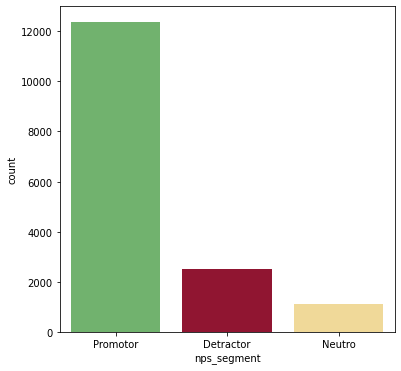

In [103]:
sns.countplot(x="nps_segment",data=df,palette=paleta,order=df['nps_segment'].value_counts().index)

In [ ]:
#imprimir las cantidades


# Crosstab

Armar un crostab por year_month en el index y NPS segment cómo columna

In [107]:
cross_table=df.pivot_table(index='year_month',columns="segmentos",values = 'nps_segment')
cross_table

KeyError: 'segmentos'

¿Para que sirve esta tabla?

Armar en terminos relativos. Es decir, en porcentaje de total por mes.

# Lineplot

En el eje x gráfica el mes y en el eje y tres lineas con detractor, neutro y promotor

Armar un cross tab con los comentarios detectados mes a mes

In [ ]:
.

¿Que mes es en el que más falla? ¿podemos sacar una conclusión?

# Case Channel

Reproducí este gráfico. ¿Para qué sirve?

HINT:

plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = df, x = 'CASE_CHANNEL',
              order = df['CASE_CHANNEL'].value_counts().index)

Instala la librería squarify y ejecuta la linea de código de aca abajo importala y

In [ ]:
#filtro = df[df['CASE_CHANNEL'].map(df['CASE_CHANNEL'].value_counts()) > 900]
label_value = df["CASE_CHANNEL"].value_counts().to_dict()
# Creo los labels usando a list comprehesion
labels = ["{} tiene {} obs".format(class_, obs) for class_, obs in label_value.items()]
# Creo colores por cantidad de trabajos
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize = (18, 10))
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)
plt.title("Cantidad de casos por CASE_CHANNEL");

Crear un cross tab entre segmento y Case chanel

# Plotea un gráfico de barras

### Crear un crostab de nps_segment por genero en porcentaje

# Edad

Imprimir los siguientes valores

Graficar la distribución de la edad

In [ ]:
rcParams['figure.figsize'] = 12,8
sns.set()
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=10)
#codigo del gráfico

# Boxplot

Armar un boxplot por segmento, representando en el eje Y la edad.

In [ ]:
fig, (ax1) = plt.subplots( figsize = (8, 8))
#sn.boxplot
ax1.set_xlabel('Conversión', fontsize=10)
ax1.set_ylabel('Edad', fontsize=10)
ax1.set_title('Boxplot Edad', fontsize=10)
ax1.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

plt.tight_layout()

# Discretización
Representar la edad en grupos de deacadas

In [ ]:
#primero crear la columna según regla de edad
#luego crosstab

In [ ]:
#ULTRA HINT: per_edad = pd.crosstab(df['nps_segment'],df['grupo_edad'])
per_edad = per_edad.T
per_edad

In [ ]:
rcParams['figure.figsize'] = 8,6
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.set_style("darkgrid")
#.plot(kind = 'bar',color = paleta)
plt.xlabel('Edad del grupo')
plt.ylabel('Tasa de Conversión sobre el total')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Conversión vs Rango Etareo')
plt.show()